# Statisical error analysis of line uncertainty 

We want to find a mean and variance for the parameters of the Hough transform for line extraction in 2 dimensions as a function of the length between two points. 

This will be a good starting point for comparing the relative accuracy of lines vs points. 

In [2]:
%matplotlib inline



In [18]:
# Simulations
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 50000
img_size = 1000 #Average side length 
bins = 100

L = 500 #pixels (average length)

sigma = 5./np.sqrt(12) #5 pixel uncertainty, assumed uniform


theta = np.random.uniform(-np.pi*0.85, np.pi*0.85, N)
x1 = np.random.uniform(0, img_size, (N, 2))
dx = np.array([np.sin(-theta)*L, np.cos(-theta) * L]).transpose()
x2 = x1 + dx
ro = x1[:, 0]*np.cos(theta) + x1[:, 1] * np.sin(theta)


dtheta = np.zeros(N)
dro    = np.zeros(N)

for i in range(N):
    x1_measured    = np.random.multivariate_normal(x1[i], sigma*np.identity(2))
    x2_measured    = np.random.multivariate_normal(x2[i], sigma*np.identity(2))
    dx_measured    = x2_measured-x1_measured
    theta_measured = np.arctan2(-dx_measured[0], dx_measured[1])
    ro_measured    = x1_measured[0]*np.cos(theta_measured) + x1_measured[1] * np.sin(theta_measured)
    ro_measured_2    = x2_measured[0]*np.cos(theta_measured) + x2_measured[1] * np.sin(theta_measured)

    dtheta[i]      = theta[i]-theta_measured
    dro[i]         = ro[i] - ro_measured



0.003382643868014664


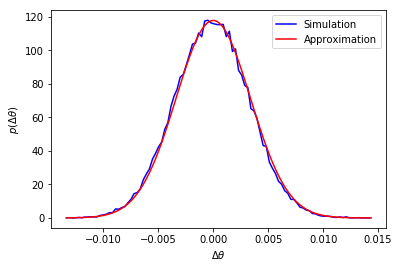

In [19]:
ans = np.histogram(dtheta, bins, density = True)
y_theta = ans[0]
x_theta = ans[1][:-1]


sig_theta = np.std(dtheta)
print(sig_theta)

plt.plot(x_theta,y_theta, "-b", x_theta, norm.pdf(x_theta, 0, sig_theta), "-r")
plt.xlabel("$\\Delta \\theta$")
plt.ylabel("$p(\\Delta \\theta)$")
plt.legend(["Simulation", "Approximation"])


1.6622574229981983


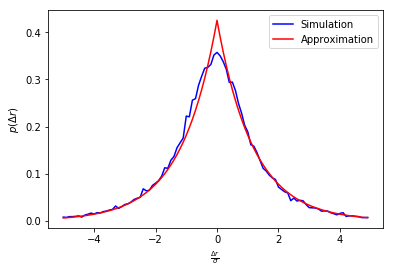

In [23]:
ans = np.histogram(dro/sigma, bins, range= (-5, 5), density = True)
y_ro = ans[0]
x_ro = ans[1][:-1]


sig_ro = np.std(dro/sigma)
print(sig_ro)


def double_exp_pdf(x, var):
    b = np.sqrt(var/2)
    return 1/(2*b)*np.exp(-np.abs(x)/b)


plt.plot(x_ro, y_ro, "-b", x_ro, double_exp_pdf(x_ro, sig_ro**2), "-r")

plt.xlabel("$\\frac{\\Delta r}{\\sigma}$")
plt.ylabel("$p(\\Delta r)$")
plt.legend(["Simulation", "Approximation"])


Want to find 

https://stats.stackexchange.com/questions/3215/trigonometric-operations-on-standard-deviations

$$ \hat{\theta} = \tan^{-1}(\Delta Y/\Delta X) $$ 
$$ \theta = \theta_0 + \Delta \theta$$

$$ \Delta Y = \sigma_y \zeta + \mu_y$$
$$ \Delta X = \sigma_x \xi + \mu_x$$

where $\zeta, \xi$ are standard normal distributions. For simplicity we will assume that $\sigma_y = \sigma_x = \sigma$, $ \mu_y = \sin(\theta_0) L $, and $  \mu_x = \cos(\theta_0) L$ where $L$ is the distance

$$ P[\hat{\theta} \le \theta] = P[\tan^{-1}(\Delta Y/\Delta X) \le \theta_0 + \Delta \theta] = P[\Delta Y/\Delta X \le \tan(\Delta \theta + \theta_0)] $$

Let $q = \tan(\theta) =  \tan(\Delta \theta + \theta_0) $

$$ = P[\sigma \zeta + \mu_y \le q (\sigma_y \zeta + \mu_y)] $$

$$ = P[\frac{\sigma}{L} (\zeta - q \xi)  \le  q  \sin(\theta_0) - \cos(\theta_0)] $$

This is a difference of gaussians giving a new gaussian being smaller than a function of $\theta$ and $\theta_0$. Let $b(\theta) = q  \sin(\theta_0) - \cos(\theta_0) $ and $\sigma^*(\theta) = (\frac{\sigma}{L})^2(1 +  \tan(\theta)^2)$ . The expression then becomes: 

$$ P[\hat{\theta} \le \theta] =  \int_{-\infty}^{b(\theta)} \mathcal{N}\left(z; 0, \sigma^*(\theta)  \right) dz $$  





We have that 

$$ p(\theta) = \frac{d(P[\hat{\theta} \le \theta])}{d\theta} = \mathcal{N}\left(b(\theta); 0, \sigma^*(\theta) \right) \cdot \frac{db(\theta)}{d\theta} + \int_{-\infty}^{b(\theta)} \frac{d\left(\mathcal{N}\left(z; 0, \sigma^*(\theta) \right)\right)}{d\theta} dz$$



This simplifies to:
    
$$ p(\theta) =\mathcal{N}\left(b(\theta); 0,\sigma^*(\theta)  \right) \cdot \left(\frac{db(\theta)}{d\theta} + \frac{d((\sigma^*(\theta))^{-2})}{d\theta}\right) +  \frac{1}{\sigma^*(\theta)}\frac{d\sigma^*(\theta) }{d\theta} \int_{-\infty}^{b(\theta)} \mathcal{N}\left(z; 0, \sigma^*(\theta) \right) dz$$


In [5]:
import sympy as sp 

from sympy import symbols, exp, init_printing, latex, tan, atan, cos, sin

init_printing()








In [6]:
sig, theta, theta0, L = symbols("sigma theta theta_0 L")

mux = L * cos(theta0)
muy = L * sin(theta0)

In [7]:

Z = (muy * (sig + 1) - mux * (sig + 1) * tan(theta - theta0))**2 / (2 * (sig**2 + sig**2 + tan(theta - theta0)**2))

In [8]:
expr = Z.diff(theta).diff(theta).subs(theta, 0)


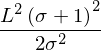

In [9]:
expr.subs(theta0, 0)